In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from collections import Counter

### 1. Load the data

In [2]:
# Load the data
hotel = pd.read_csv(r'F:\IMP_2022\KPMG\Jingjing Chen\Jingjing Chen\KPMG Lighthouse NZ Early Career Assessment\data.csv')
# Check data dimensions
hotel.shape

(515738, 12)

### 2.1 Top 10 hotels by the number of reviews they’ve recieved

In [3]:
df = hotel.copy()
df1 = df[["hotel_name","total_number_of_reviews_reviewer_has_given"]]

# Obtain each hotel name and the corresponding total number of reviews
df2=df1.groupby('hotel_name').sum()
df2

,total_number_of_reviews_reviewer_has_given
hotel_name,
11 Cadogan Gardens,159
1K Hotel,148
25hours Hotel beim MuseumsQuartier,4823
41,206
45 Park Lane Dorchester Collection,56
...,...
citizenM London Bankside,1517
citizenM London Shoreditch,1676
citizenM Tower of London,3366


In [4]:
df3 = df2.sort_values(by='total_number_of_reviews_reviewer_has_given', ascending=False).reset_index()
df3

,hotel_name,total_number_of_reviews_reviewer_has_given
0,Holiday Inn London Kensington,221759
1,Park Plaza Westminster Bridge London,172954
2,The Student Hotel Amsterdam City,79626
3,Atlantis Hotel Vienna,52650
4,Copthorne Tara Hotel London Kensington,50092
...,...,...
1487,Drawing Hotel,14
1488,XO Hotel,13
1489,Le Lavoisier,12
1490,Boundary Rooms Suites,12


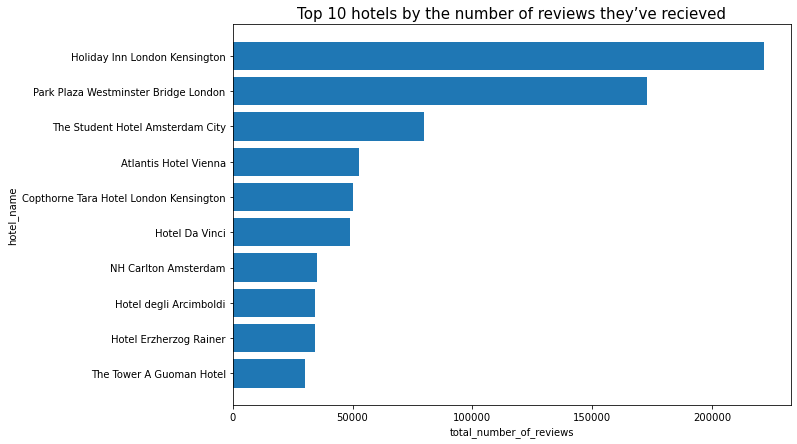

In [5]:
# To display the top 10 hotels by number of reviews in descending order
# The top bar shows the hotel with the highest number of reviews
df_sorted_top10_asc=df3.head(10).sort_values(by='total_number_of_reviews_reviewer_has_given', ascending=True)

hotel_name = df_sorted_top10_asc['hotel_name']
reviews_num = df_sorted_top10_asc['total_number_of_reviews_reviewer_has_given']
 
fig = plt.figure(figsize =(10, 7))
 
# Horizontal bar plot
plt.barh(hotel_name, reviews_num,data=df_sorted_top10_asc)

plt.title('Top 10 hotels by the number of reviews they’ve recieved',size=15)
plt.ylabel('hotel_name')
plt.xlabel('total_number_of_reviews')

# plt.savefig('top_10.png', bbox_inches = 'tight')
plt.show()

### 2.2 The 10 least reliable hotels, measured using the interquartile range of reviews

In [6]:
col = df3['total_number_of_reviews_reviewer_has_given']
col

0       221759
1       172954
2        79626
3        52650
4        50092
         ...  
1487        14
1488        13
1489        12
1490        12
1491        10
Name: total_number_of_reviews_reviewer_has_given, Length: 1492, dtype: int64

In [7]:
# The formula for quartiles is given by:
# Lower Quartile (Q1) = 1st quartile or 25th percentile
# Upper Quartile (Q3)= 3rd quartile or 75th percentile
# Interquartile Range (IQR) = Q3 – Q1.

lower_quantile, upper_quantile = col.quantile([.25, .75])
print(lower_quantile, upper_quantile)

199.75 2400.0


In [8]:
bottom10=df3[(col >= lower_quantile) & (col<=upper_quantile)]
print(bottom10.shape)

(747, 2)


In [9]:
bottom10.tail(10)

,hotel_name,total_number_of_reviews_reviewer_has_given
1109,Best Western Premier Louvre Saint Honor,205
1110,Hotel Maison FL,204
1111,Golden Tulip Washington Opera,204
1112,H tel Aiglon Esprit de France,202
1113,Royal Garden Champs Elysees,202
1114,Novotel Paris 17,202
1115,Terrass H tel Montmartre by MH,201
1116,The Colonnade,201
1117,Best Western Aulivia Op ra,200
1118,Hotel Pulitzer Paris,200


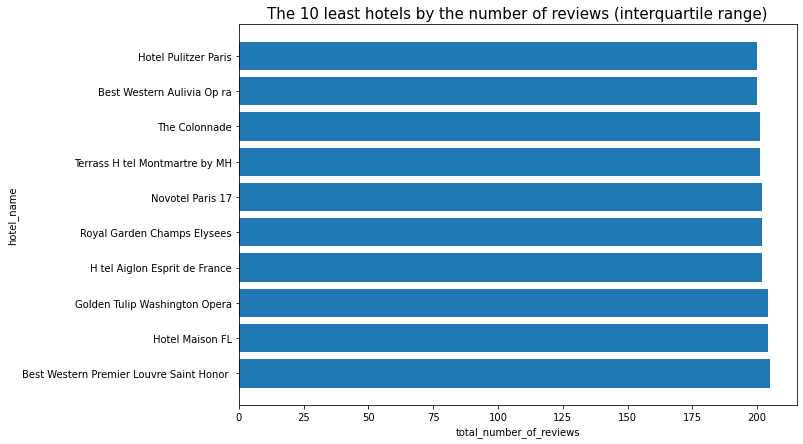

In [10]:
# To display the least/bottom 10 hotels by number of reviews in ascending order
# The top bar shows the hotel with the least number of reviews
hotel_name2 = bottom10.tail(10)['hotel_name']
reviews_num2 = bottom10.tail(10)['total_number_of_reviews_reviewer_has_given']
 
fig = plt.figure(figsize =(10, 7))
 
# Horizontal bar plot
plt.barh(hotel_name2, reviews_num2,data=bottom10.tail(10))

plt.title('The 10 least hotels by the number of reviews (interquartile range)',size=15)
plt.ylabel('hotel_name')
plt.xlabel('total_number_of_reviews')

# plt.savefig('the_least_10.png', bbox_inches = 'tight') 
plt.show()

### 3. Create a column called positive_review_wc with the number of words included in the comments of the positive_review column

In [11]:
# Create a column
hotel["positive_review_wc"] = [len(i.strip().split(' ')) for i in hotel['positive_review']]
hotel.head()

,hotel_address,review_date,hotel_name,negative_review,positive_review,reviewer_score,tags,days_since_review,reviewer_nationality,total_number_of_reviews_reviewer_has_given,lat,lng,positive_review_wc
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,8/03/2017,Hotel Arena,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,Russia,1,52.360576,4.915968,9
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,8/03/2017,Hotel Arena,No Negative,No real complaints the hotel was great great ...,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,Ireland,1,52.360576,4.915968,103
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/31/2017,Hotel Arena,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,Australia,1,52.360576,4.915968,19
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/31/2017,Hotel Arena,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,United Kingdom,1,52.360576,4.915968,24
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/24/2017,Hotel Arena,You When I booked with your company on line y...,Amazing location and building Romantic setting,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,New Zealand,1,52.360576,4.915968,6


In [12]:
hotel.shape

(515738, 13)

<font face=Cambria color=blue size=3>
Answer:

 <font face=Cambria color=black size=3>
It can be seen that after adding a column, the new table has 13 columns (the original has 12 columns), and the new column shows the number of words included in the comments of the positive_review column.

### 4. Prepare a scatter plot comparing positive_review_wc and reviewer_score.

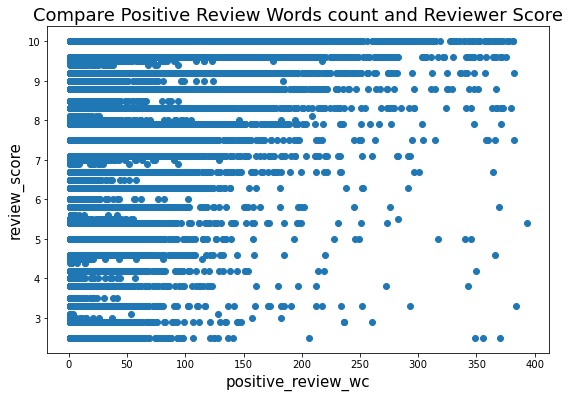

In [13]:
# Plot a scatter plot of comparing positive_review_wc and reviewer_score.
fig,ax = plt.subplots(figsize=(9,6))
ax.set_title('Compare Positive Review Words count and Reviewer Score',size=18)
ax.set_xlabel('positive_review_wc',fontsize=15) # x-axis name
ax.set_ylabel('review_score',fontsize=15) # y-axis name
ax.scatter(x='positive_review_wc',y='reviewer_score',data=hotel)

<font face=Cambria color=blue size=3>
Comment on the relationship:

 <font face=Cambria color=black size=3>
The two variables/features positive_review_wc and reviewer_score are not related.

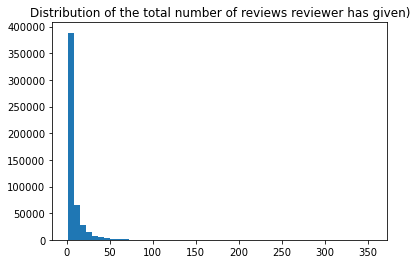

In [14]:
# The distribution of total_number_of_reviews_reviewer_has_give feature  
x = hotel['total_number_of_reviews_reviewer_has_given']
plt.hist(x, bins = 50)
plt.title('Distribution of the total number of reviews reviewer has given)')
plt.show()

<font face=Cambria color=blue size=3>
Explanations:

 <font face=Cambria color=black size=3>
As seen from the scatter plot, positive_review_wc represents the number of words included in the comments of the positive_review column. 
When positive_review_wc is less than 50, regardless of the number of words, it has no effect on the reviewer score. There is no evidence that they are related. <br>    
    
When positive_review_wc is greater than 50, as the number of words increases, there is a slight trend that the reviewer score seems to be more concentrated in the high-scoring area, such as when positive_review_wc is greater than 300. However, there is still no obvious positive or negative correlation between  positive_review_wc and reviewer_score. <br>
    
In addition, the histogram above shows the distribution of the total number of reviews, and it can be seen that the number of comments greater than 50 is very small, at the tail of the histogram, so it can be ignored. Thus, combined with the above scatterplot reviews, positive_review_wc and reviewer_score are not relevant.

### 5. Obtain the 10 most frequently used words from the positive_review column. Consider removing stop words before counting

In [15]:
# Removing stop words before counting
stop_words = stopwords.words('english')
print(type(stop_words))
print(len(stop_words))
# stop_words.append('nor')

<class 'list'>
179


In [16]:
hotel["filtered_by_stop_words"] = [" ".join([word for word in text.split() if word.lower() not in stop_words]) for text in hotel['positive_review']]
print(hotel.shape)
hotel.head()

(515738, 14)


,hotel_address,review_date,hotel_name,negative_review,positive_review,reviewer_score,tags,days_since_review,reviewer_nationality,total_number_of_reviews_reviewer_has_given,lat,lng,positive_review_wc,filtered_by_stop_words
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,8/03/2017,Hotel Arena,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,Russia,1,52.360576,4.915968,9,park outside hotel beautiful
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,8/03/2017,Hotel Arena,No Negative,No real complaints the hotel was great great ...,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,Ireland,1,52.360576,4.915968,103,real complaints hotel great great location sur...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/31/2017,Hotel Arena,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,Australia,1,52.360576,4.915968,19,Location good staff ok cute hotel breakfast ra...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/31/2017,Hotel Arena,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,United Kingdom,1,52.360576,4.915968,24,Great location nice surroundings bar restauran...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/24/2017,Hotel Arena,You When I booked with your company on line y...,Amazing location and building Romantic setting,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,New Zealand,1,52.360576,4.915968,6,Amazing location building Romantic setting


In [17]:
# Obtain the 10 most frequently used words
df_temp = hotel["filtered_by_stop_words"]
df_new = Counter(" ".join(df_temp).split()).most_common(10)
top10_frequency_words = pd.DataFrame(df_new, columns=['word', 'frequency'])
print(top10_frequency_words)

        word  frequency
0      staff     154145
1   location     138293
2       room     123504
3      hotel     111808
4       good      84737
5    helpful      72954
6   friendly      72417
7      great      64576
8  breakfast      64335
9      clean      57042


<font face=Cambria color=blue size=3>
Answer:

 <font face=Cambria color=black size=3>
The top frequency words are: staff, location, room, hotel, good, helpful, friendly, great, breakfast, clean.